<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>



# **시각화라이브러리 ① - Matplotlib**

- Matplotlib은 파이썬에서 가장 널리 사용되는 시각화 라이브러리 중 하나입니다.
- 데이터를 시각화하기 위한 다양한 종류의 그래프를 생성할 수 있습니다.
- 데이터 시각화에 필요한 모든 기능을 갖춘 강력한 도구입니다.
- 다양한 스타일과 색상 팔레트, 그리드 라인, 축 레이블, 범례 등을 지원합니다.
- 다른 라이브러리와 함께 사용될 때도 많이 있습니다.

## **1. 라이브러리 불러오기**

-  **matplotlib.pyplot** 라이브러리를 **plt** 별칭을 주고 불러옵니다.

In [1]:
# 한글 표시를 위해 설치
!pip install koreanize_matplotlib -q

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글이 사용가능한 library
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'  # 차트를 retina로 그리기 위해

## **2. 기본차트 그리기**

- Matplotlib의 **plot()** 함수를 사용해 그래프를 그리는 기본적인 방법을 살펴봅니다.
- 학습에서는 plot() 함수로 선 그래프를 그려보지만, 다른 그래프에도 적용할 수 있는 방법입니다.

In [5]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/stock.csv'
stock = pd.read_csv(path)

# 전처리
stock = stock.loc[stock['Date'].between('2022-12-01', '2022-12-31')]  # ,:] (생략)
stock.reset_index(drop=True, inplace=True)
stock.insert(1, 'Day', stock['Date'].str.split('-').str[2])
stock.drop('Date', axis=1, inplace=True)

# 확인
stock.head()

,Day,Open,High,Low,Close,Adj Close,Volume
0,01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400
1,02,145.960007,148.000000,145.649994,147.809998,147.809998,65447400
2,05,147.770004,150.919998,145.770004,146.630005,146.630005,68826400
3,06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
4,07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100


### **2.1. 그래프 그리기**

- 값을 하나만 전달하면 이 값이 y축 값이 됩니다.
- 값의 위치를 나타내는 인덱스가 x 축이 됩니다.

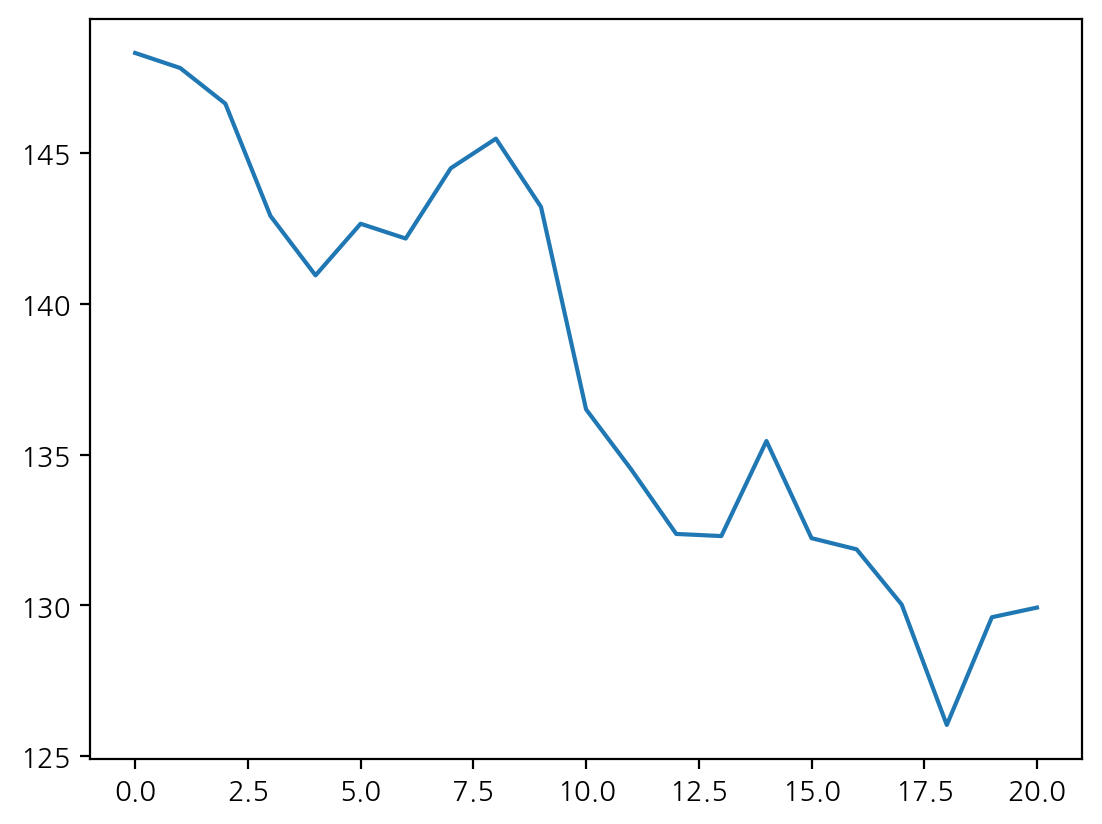

In [7]:
plt.plot(stock['Close'])  # 꺾은선 그래프
plt.show()

### **2.2. x축, y축의 값 지정하기**

- x축과 y축 값을 지정하여 그래프를 그립니다.

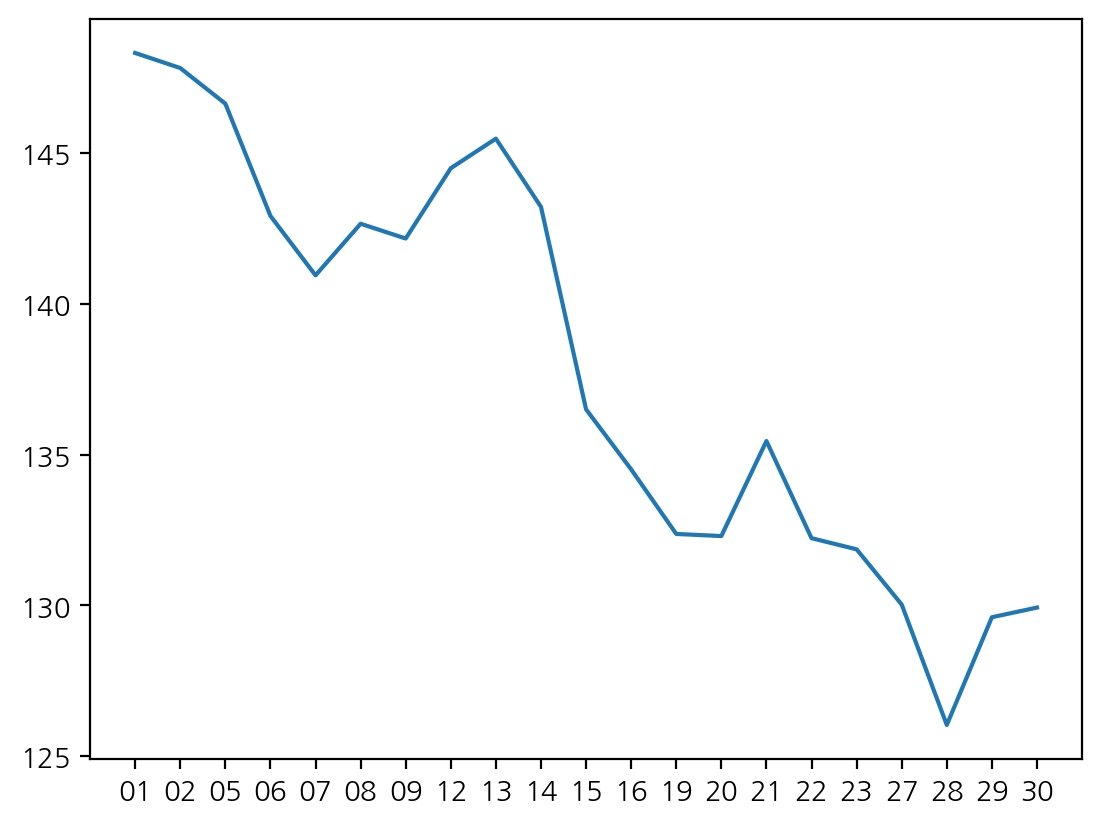

In [10]:
plt.plot(stock['Day'], stock['Close'])  # Day열은 숫자가 아니라 문자로 인식하기 때문에 생략이 불가능
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

*️⃣ stock 데이터프레임의 Day 열을 x 축, Open 열을 y 축으로 하여 선 그래프를 그리세요.

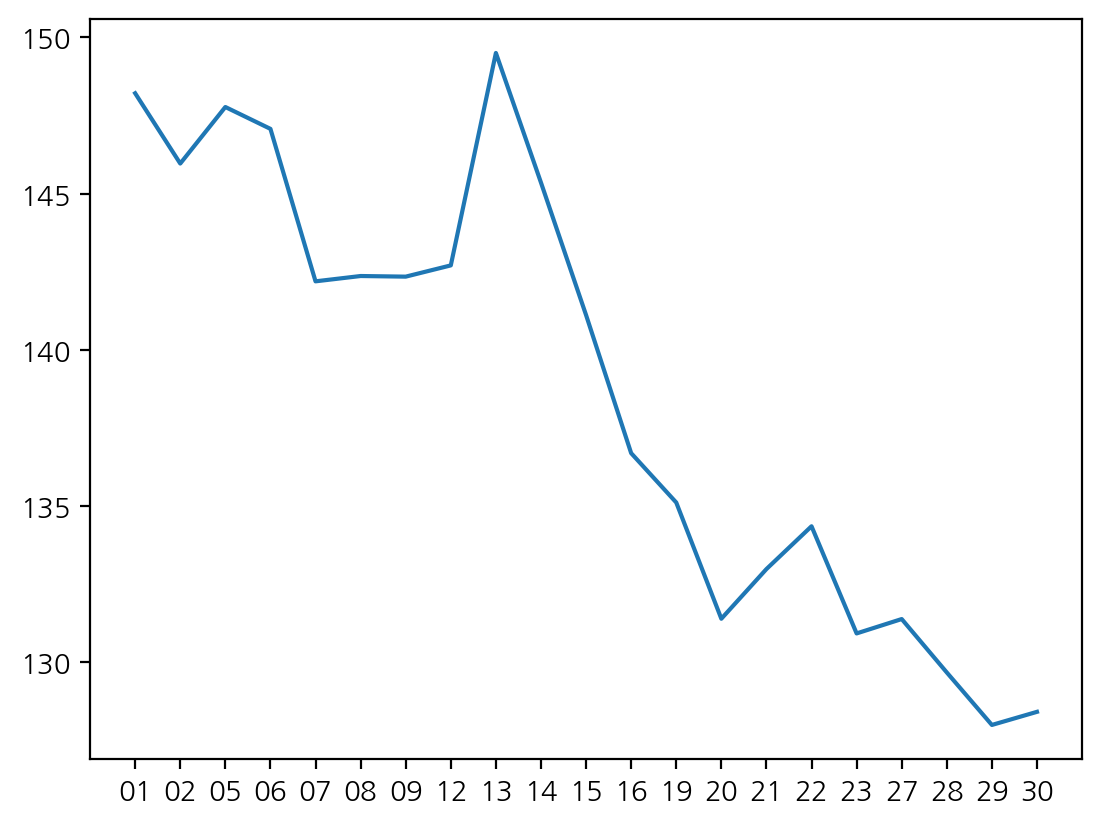

In [12]:
plt.plot(stock['Day'], stock['Open'])
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

## **3. 그래프 꾸미기**

- 다양한 옵션을 사용해 그래프를 꾸며봅니다.

### **3.1. x, y축 이름과 타이틀 지정**

- **xlabel(), ylabel()** 함수를 사용해 각 축의 이름을 지정합니다.
- **title()** 함수를 사용해 그래프 제목을 지정합니다.

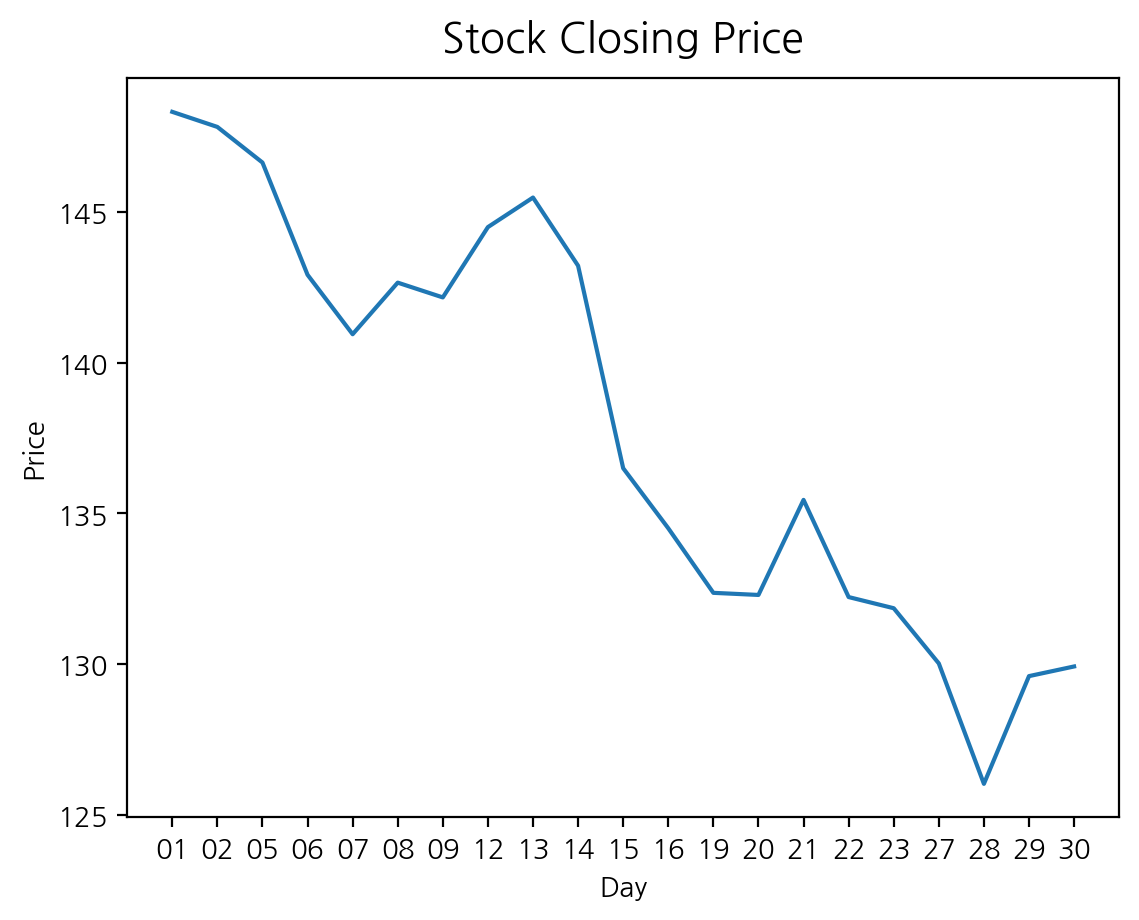

In [13]:
plt.plot(stock['Day'], stock['Close'])
plt.title('Stock Closing Price', size=15, pad=10)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

### **3.2. 선 스타일 설정**

- 다음 정보를 참고해 선 스타일, 마커 모양 선 색상을 지정합니다.

<img src='https://raw.githubusercontent.com/jangrae/img/master/style.png' width=600 align="left"/>

- go--: 초록색 점선과 원 모양 마커

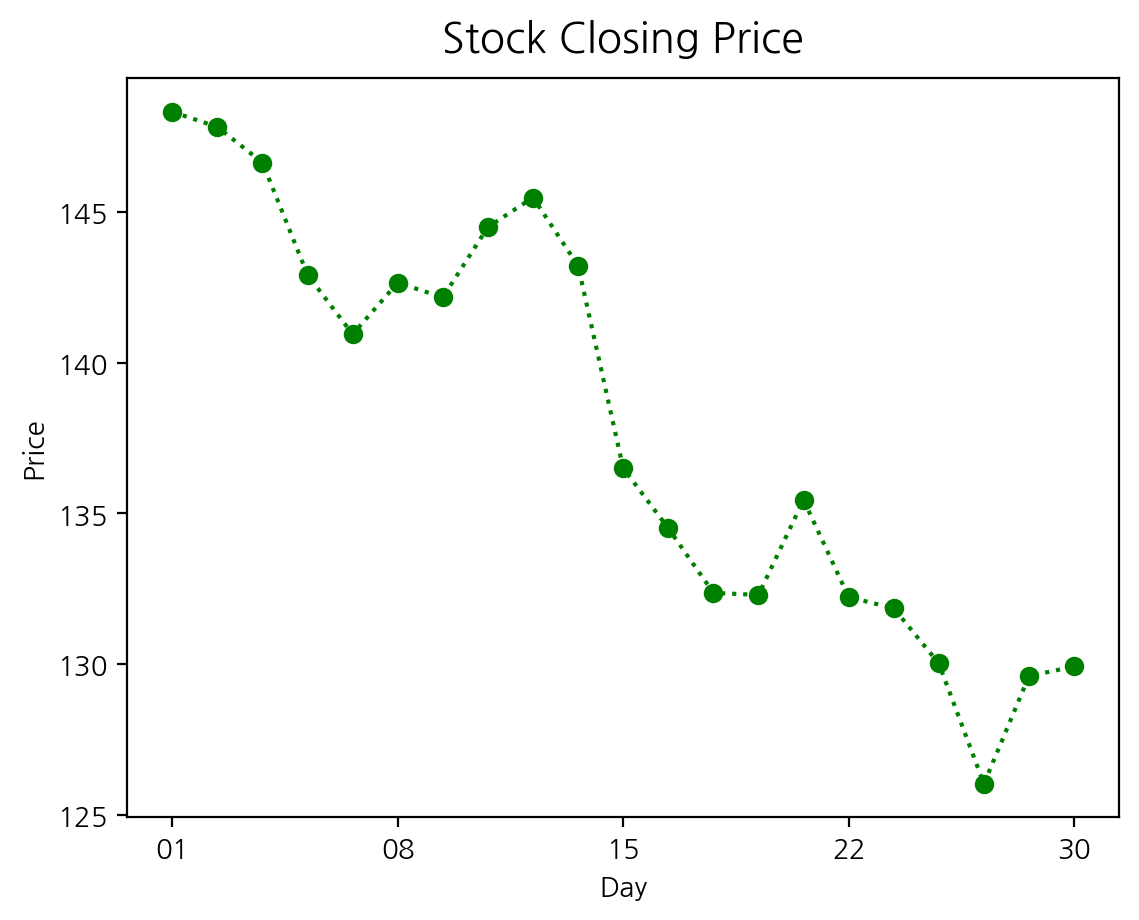

In [28]:
plt.plot(stock['Day'], stock['Close'], 'og:')
plt.title('Stock Closing Price', size=15, pad=10)
plt.xlabel('Day')
plt.ylabel('Price')
plt.xticks(range(0,21,5))
plt.show()

### **3.3. 여러 그래프 겹쳐서 그리기**

- 여러 그래프를 같이 표시할 수 있습니다.
- show() 함수로 마무리 하기 전에 plot() 함수를 반복해 사용합니다.
- 서로 다른 색상, 선 스타일과 마커를 지정할 수 있습니다.

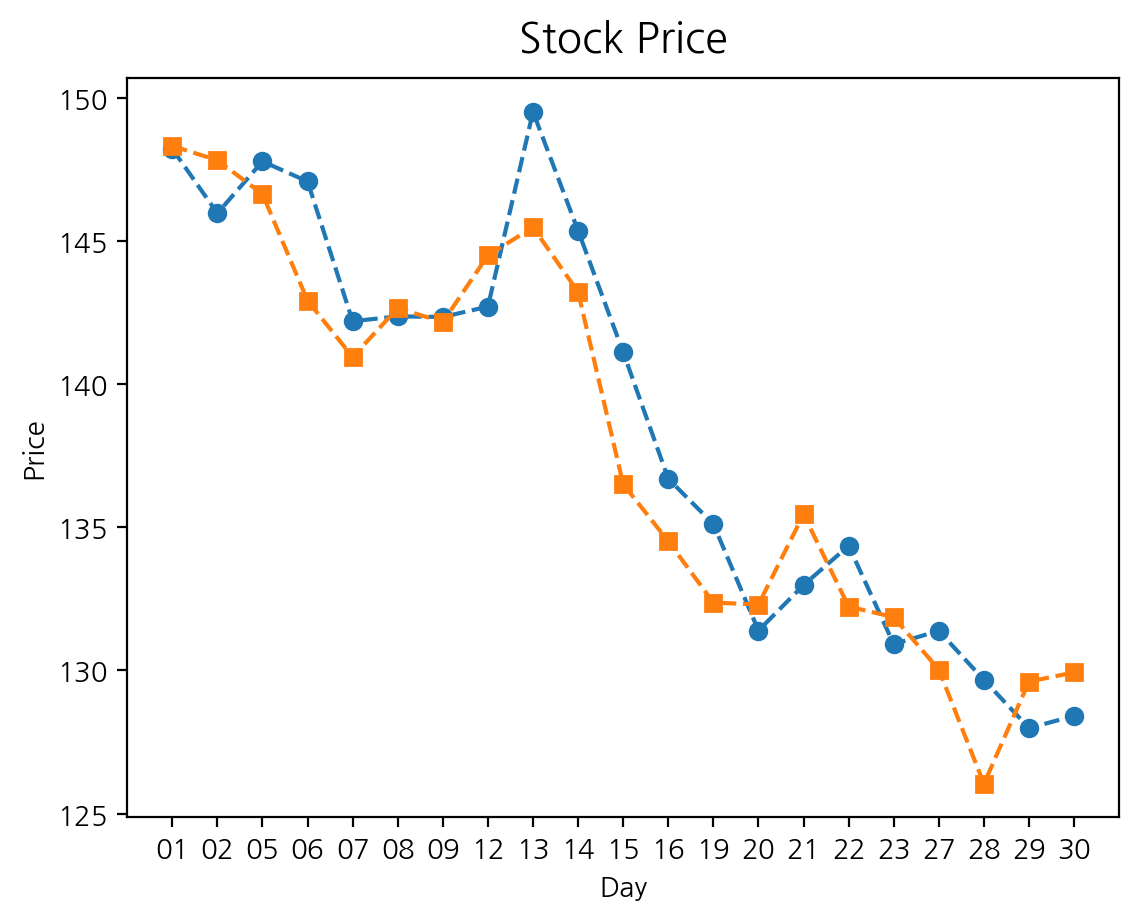

In [32]:
plt.plot(stock['Day'], stock['Open'], 'o--')
plt.plot(stock['Day'], stock['Close'], 's--')
plt.title('Stock Price', size=15, pad=10)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

- 참고로 위 코드는 다음과 같이 작성할 수 있습니다.

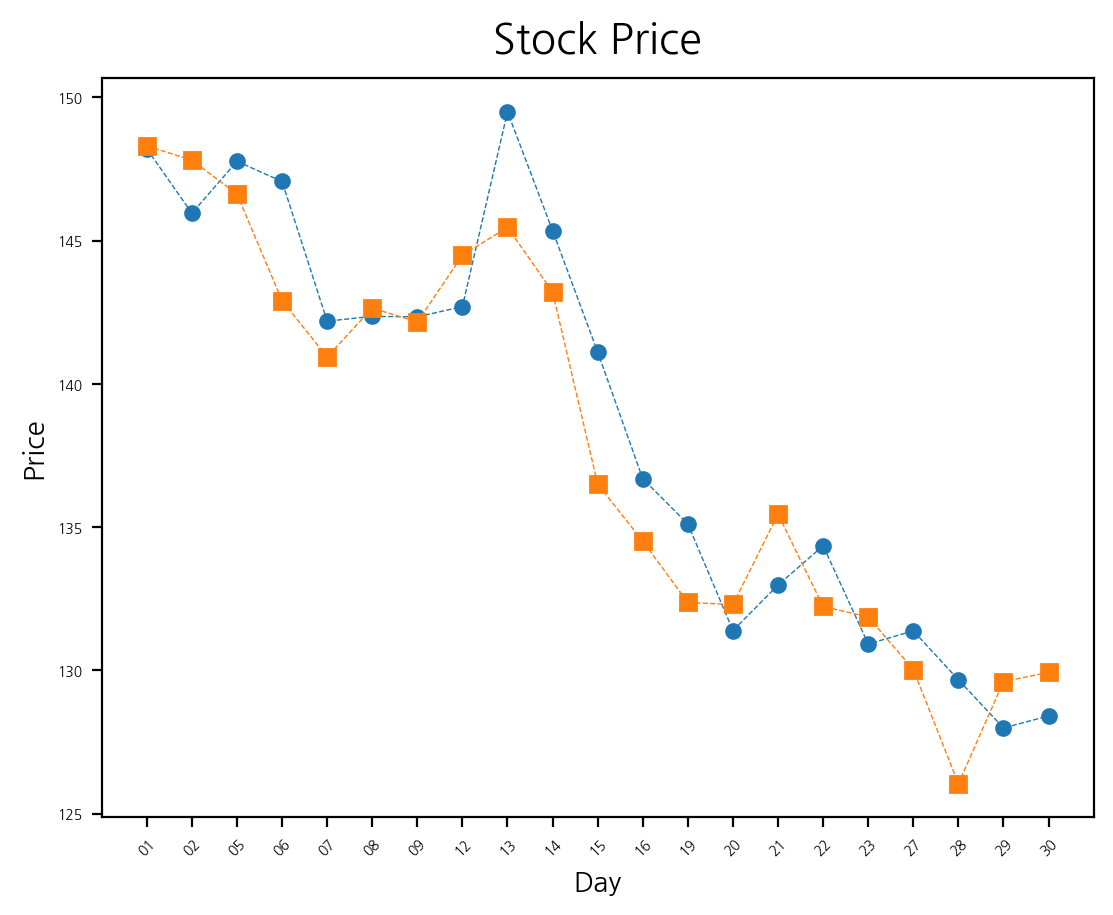

In [45]:
plt.plot(stock['Day'], stock['Open'], 
         color='tab:blue', 
         marker='o', 
         linestyle='--', 
         linewidth=0.5,
         markersize=5)
plt.plot(stock['Day'], 
         stock['Close'], 
         color='tab:orange', 
         marker='s', 
         linewidth=0.5,
         linestyle='--')
plt.title('Stock Price', size=15, pad=10)
plt.xlabel('Day')
plt.ylabel('Price')
plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=5)
plt.show()

### **3.4. 범례, 괘선 추가**

- **legend()** 함수를 사용해 범례를 표시해 그래프에 대한 이해를 도울 수 있습니다.
- **label** 속성을 사용해 각 그래프의 이름을 지정한 후 legend() 함수를 사용합니다.
- 표시할 범례 정보를 legend() 함수 안에 리스트 형태로 지정할 수 도 있습니다.
- **grid()** 함수를 사용해 괘선을 표시합니다.

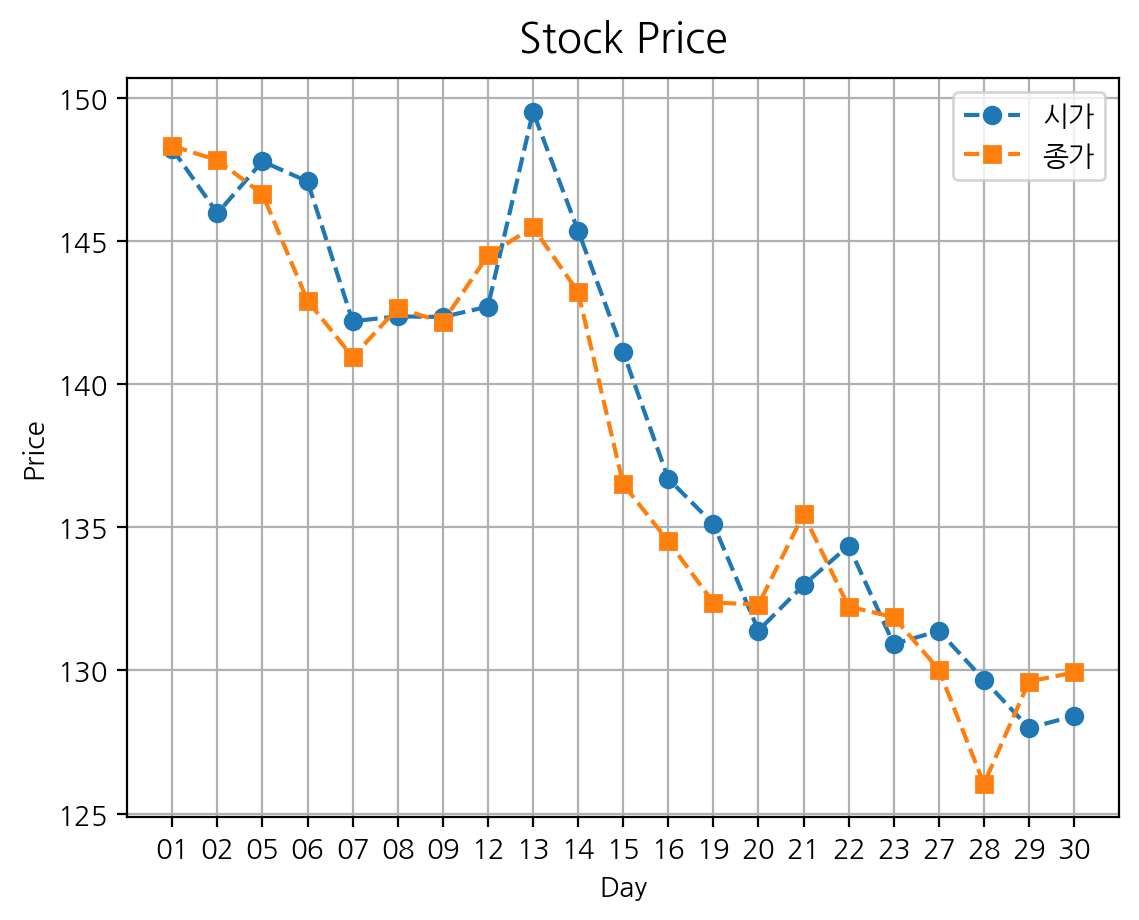

In [49]:
plt.plot(stock['Day'], stock['Open'], 'o--', label='Open')
plt.plot(stock['Day'], stock['Close'], 's--', label='Close')
plt.title('Stock Price', size=15, pad=10)
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend(['시가', '종가'])   # loc='upper left' 등으로 위치 변경 가능, default='best' / lengend안에서 레이블을 직접 지정 가능
plt.grid()     # axis 지정 가능 ('both', 'x', 'y')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

*️⃣ 아래 정보를 참고해 선 그래프를 그리세요.

- Day 열과 High 열, Day 열과 Low 열을 각각 x 축과 y 축으로 하는 두 개의 선 그래프를 겹쳐서 그리기
- x 축 이름: 거래일
- y 축 이름: 가격
- marker: 적절한 모양으로 설정
- title: 12월 주식 최고/최저가
- legend: 최고가, 최저가
- grid: 가로선 표시

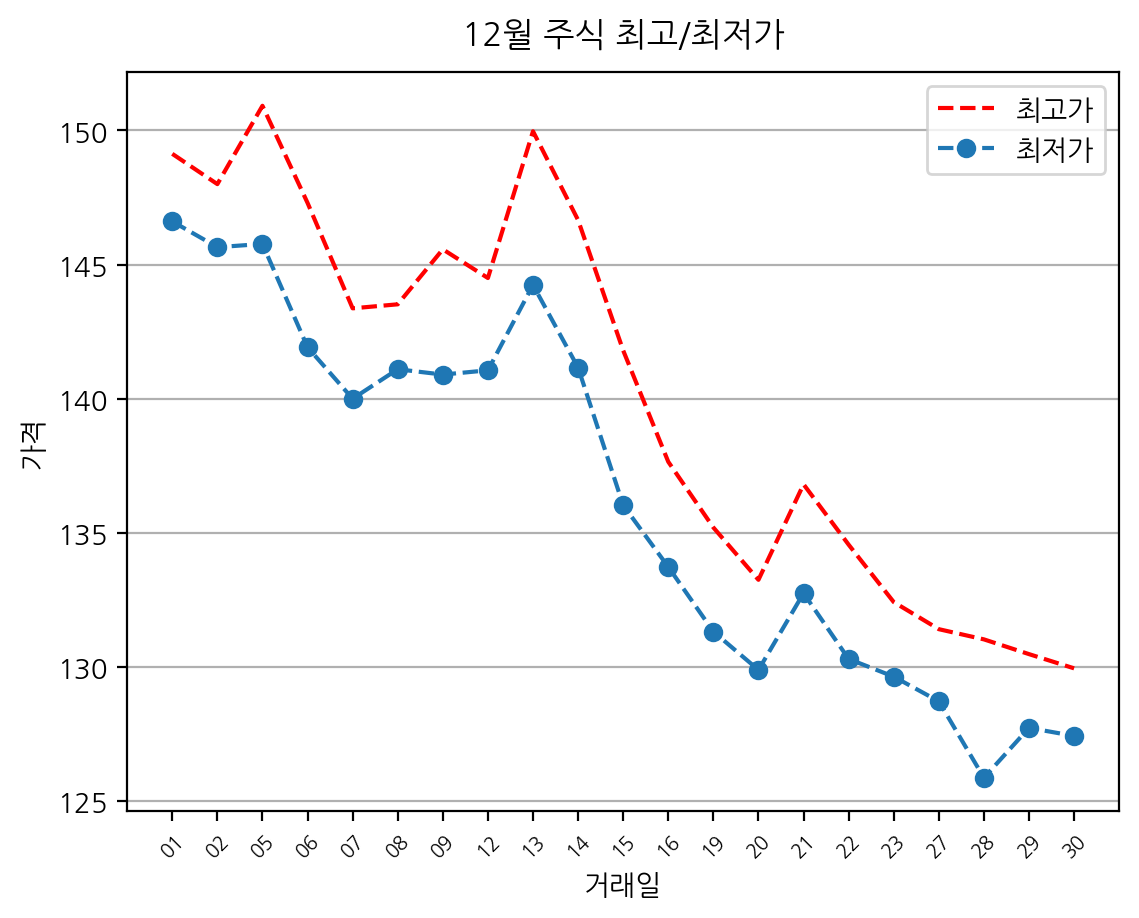

In [66]:
plt.plot(stock['Day'], stock['High'], 'r--', label='High')
plt.plot(stock['Day'], stock['Low'], 'o--', label="Low")
plt.title('12월 주식 최고/최저가', pad=10)
plt.xlabel('거래일')
plt.ylabel('가격')
plt.legend(['최고가', '최저가'])
plt.xticks(rotation=45, fontsize=7)
plt.grid(axis='y')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

## **4. 추가 기능**

- 좀 더 세밀한 설정을 위해 사용할 수 있는 기능을 추가로 학습합니다.

### **4.1. 축 범위 조정하기**

- **xlim(), ylim()** 함수를 사용해 각 축에 표시할 범위를 지정합니다.

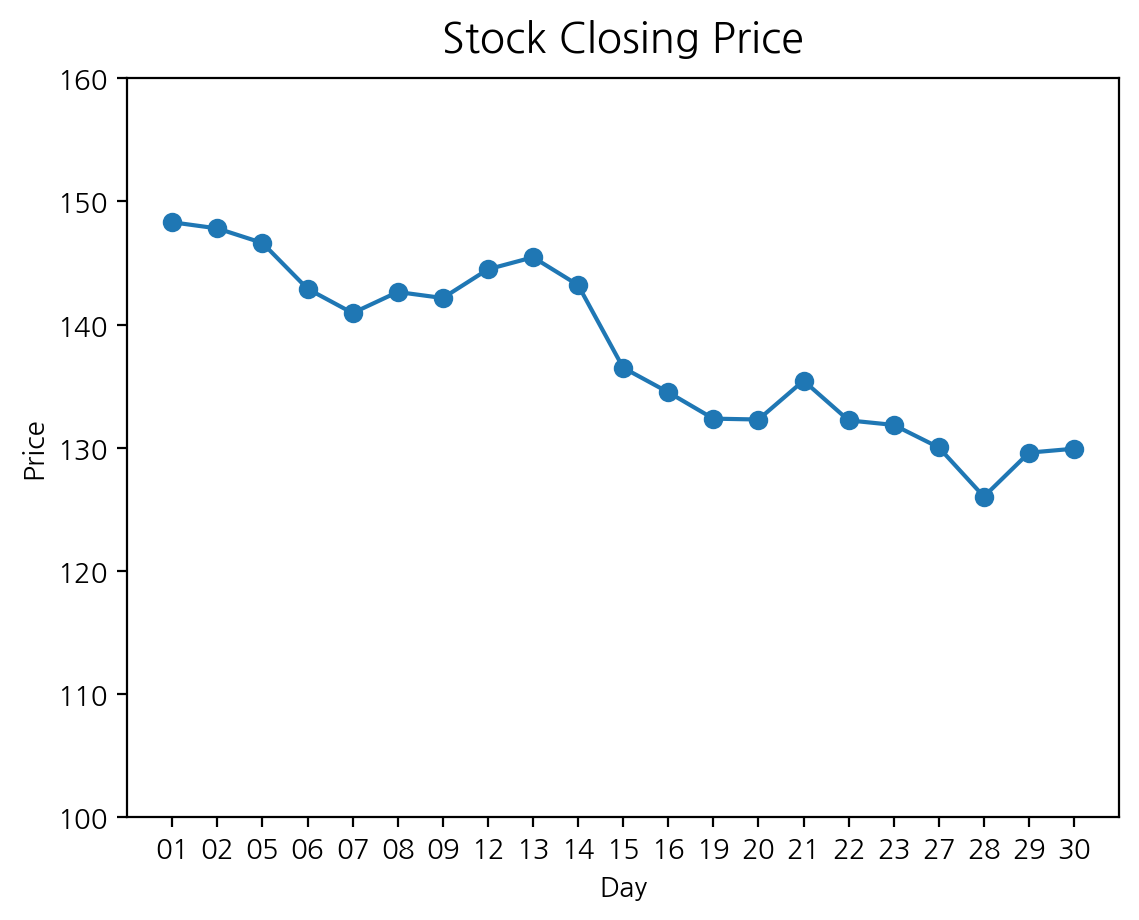

In [67]:
plt.plot(stock['Day'], stock['Close'], marker='o')
plt.title('Stock Closing Price', size=15, pad=10)
plt.xlabel('Day')
plt.ylabel('Price')
plt.ylim(100, 160)
plt.show()

### **4.2. 그래프 크기 조정**

- **figure()** 함수를 사용해 그래프 크기를 조절합니다.
- 기본 크기는 (6.4, 4.4) 입니다.

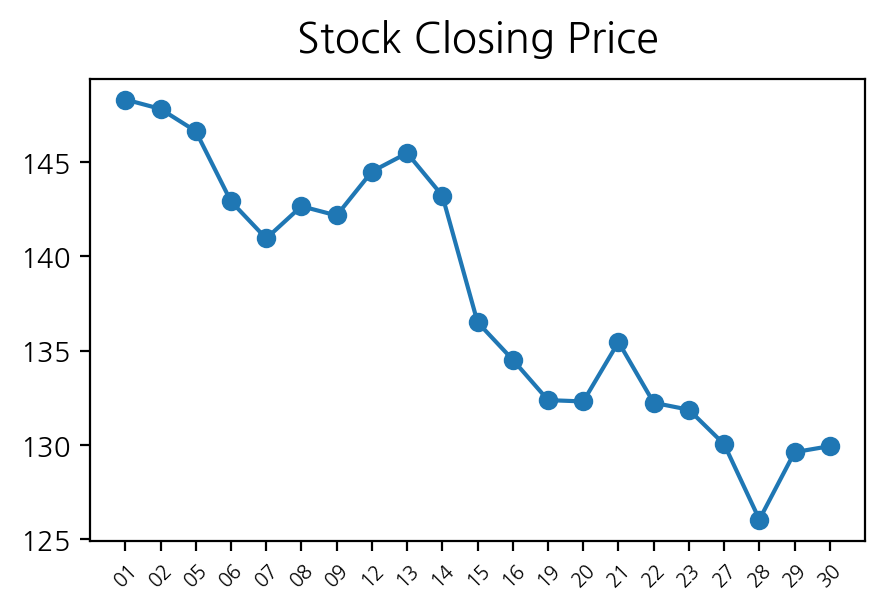

In [70]:
plt.figure(figsize=(5, 3))
plt.plot(stock['Day'], stock['Close'], marker='o')
plt.title('Stock Closing Price', size=15, pad=10)
plt.xticks(fontsize=7, rotation=45)
plt.show()

### **4.3. 수평선, 수직선 추가**

- **axhline(), axvline()** 함수를 사용해 임의 위치에 가로선과 세로선을 그립니다.

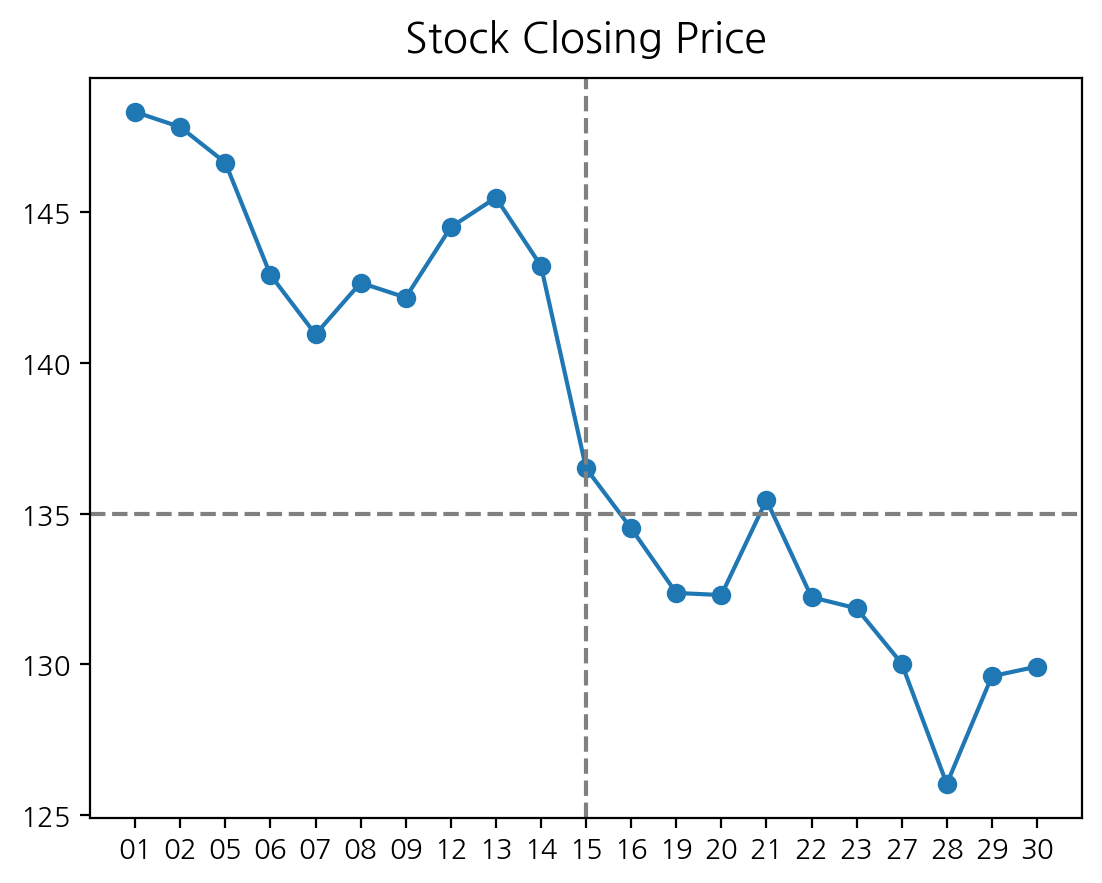

In [71]:
plt.plot(stock['Day'], stock['Close'], marker='o')
plt.title('Stock Closing Price', size=15, pad=10)
plt.axhline(135, color='grey', linestyle='--')
plt.axvline(10, color='grey', linestyle='--')
plt.show()

### **4.4. 그래프에 텍스트 추가**

- **text()** 함수를 사용해 임의 위치에 텍스트를 출력합니다.

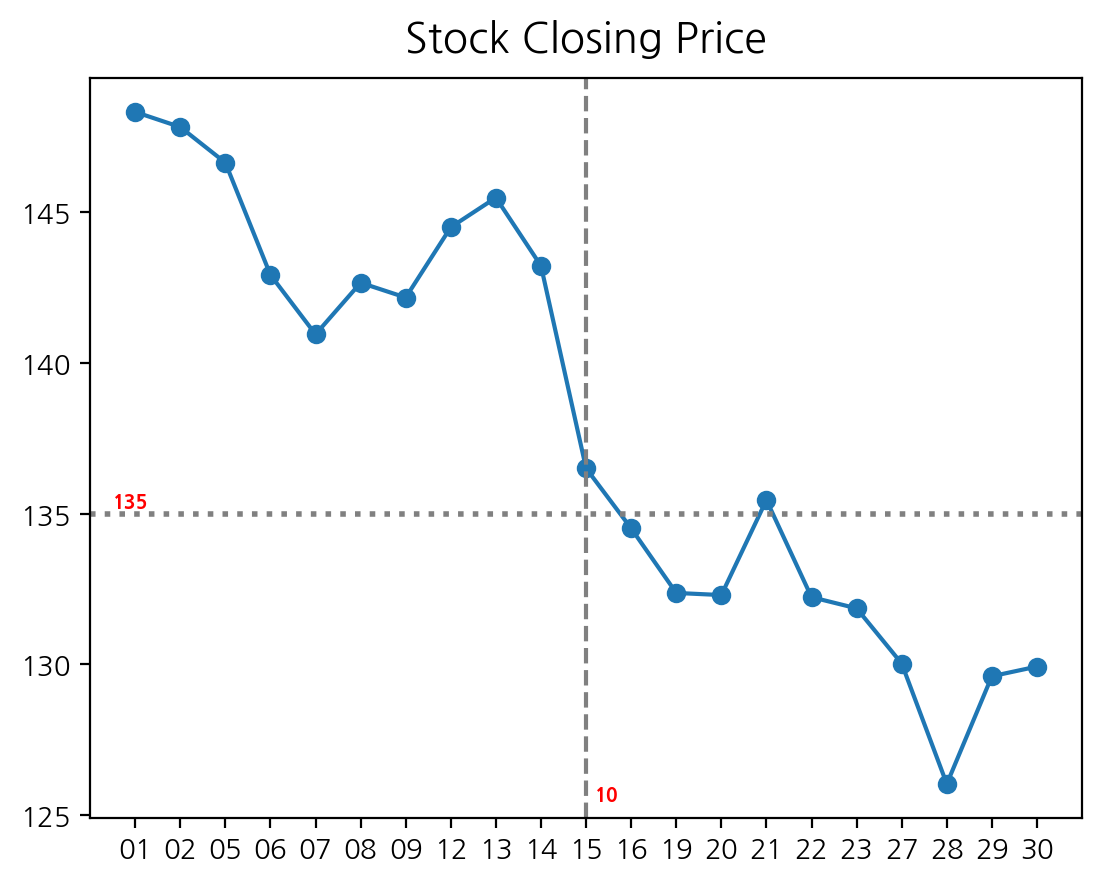

In [80]:
plt.plot(stock['Day'], stock['Close'], marker='o')
plt.title('Stock Closing Price', size=15, pad=10)
plt.axhline(135, color='grey', linestyle=':', linewidth=2)
plt.axvline(10, color='grey', linestyle='--')
plt.text(-0.5, 135.2, '135', color='r', size=7, weight='bold')
plt.text(10.2, 125.5, '10', color='r', size=7, weight='bold')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

*️⃣ 아래 정보를 참고해 선 그래프를 그리세요.

- Day 열과 High 열을 x 축과 y 축으로 하는 그래프
- x 축 이름: 거래일
- y 축 이름: 시세
- title: 12월 주식 일별 최고가
- y 값의 평균선 추가
- 적절한 위치에 평균값 표시
- marker: 적절한 모양으로 설정

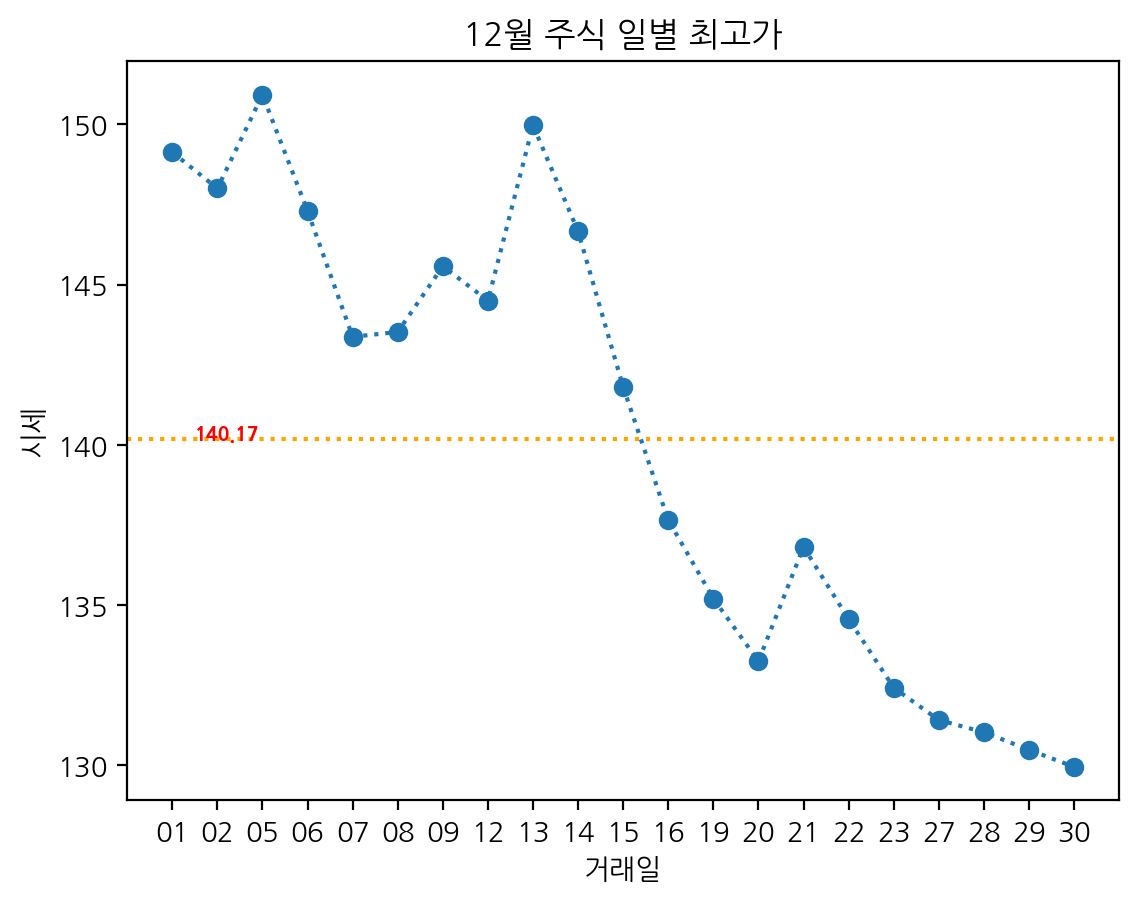

In [104]:
y_mean = stock['High'].mean().round(2)
y_mean
plt.plot(stock['Day'], stock['High'], ':', marker='o')
plt.xlabel('거래일')
plt.ylabel('시세')
plt.title('12월 주식 일별 최고가')
plt.axhline(y_mean, color='orange', linestyle=':')
plt.text(0.5, y_mean, y_mean, color='r', size=7, weight='bold')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

### **4.5. 위, 아래로 그래프 그리기**

- **subplot()** 함수를 사용해 여러 행, 여러 열로 그래프를 한 번에 표시할 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/subplot.png' width=600/>

- subplot(행 수, 열 수, 위치) 형태로 지정합니다.
- 만일 2행 1열로 표시할 것이면 subplot(2, 1, 1), subplot(2, 1, 2)를 사용합니다.
- **tight_layout()** 함수를 사용해 그래프가 겹치지 않게 정리할 수 있습니다.

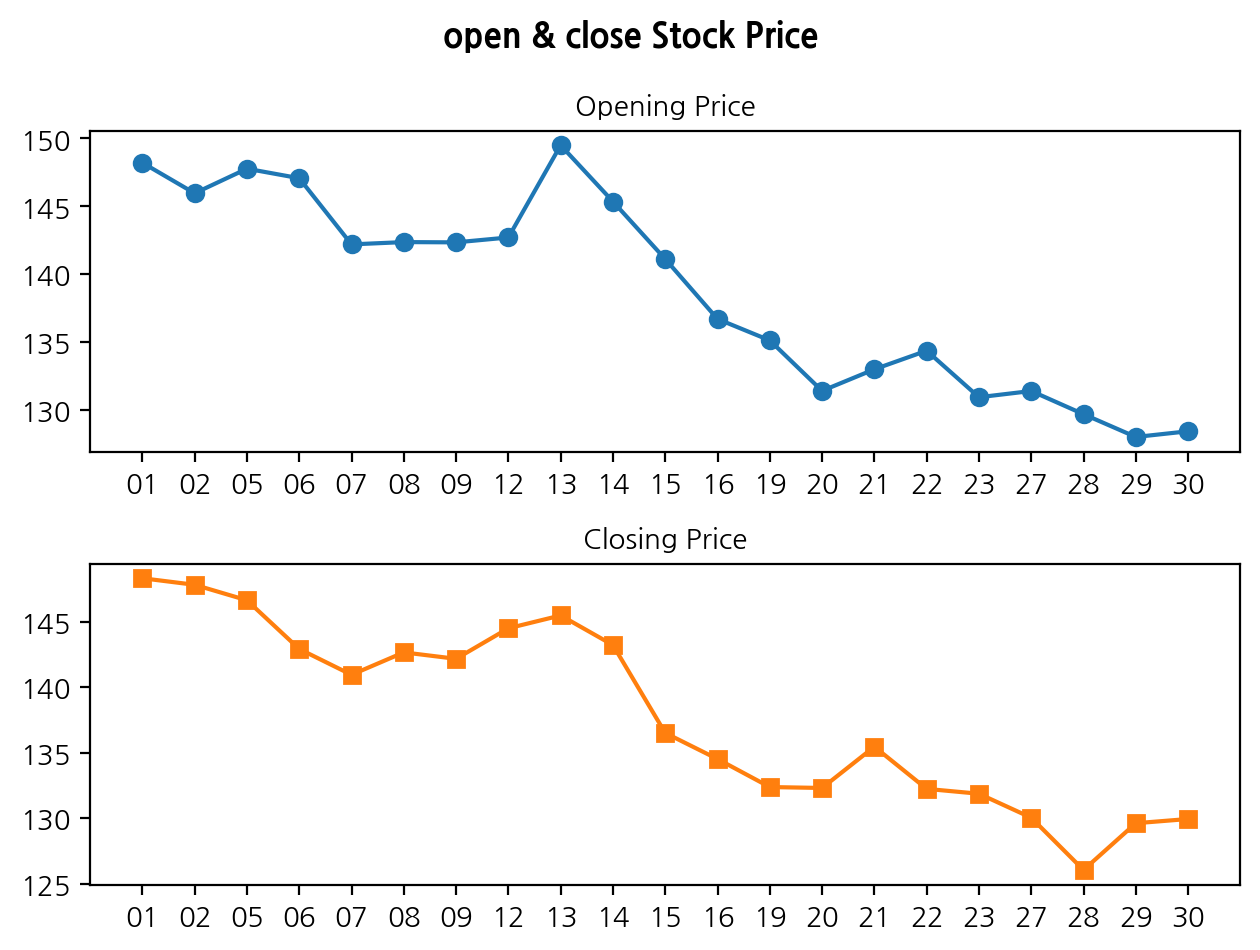

In [121]:
plt.subplot(2, 1, 1)  # 2행 1열의 첫번째
plt.plot(stock['Day'], stock['Open'], color='tab:blue', marker='o')
plt.title('Opening Price', size=10)

plt.subplot(2, 1, 2)  # 2행 1열의 두번째
plt.plot(stock['Day'], stock['Close'], color='tab:orange', marker='s')
plt.title('Closing Price', size=10)

plt.suptitle('open & close Stock Price', weight='bold', ha='center')
plt.tight_layout()  # 두 그래프가 겹칠 경우 활용
plt.show()

### **4.6. 옆으로 그래프 그리기**

- 만일 1행 2열로 표시할 것이면 subplot(1, 2, 1), subplot(1, 2, 2)를 사용합니다.

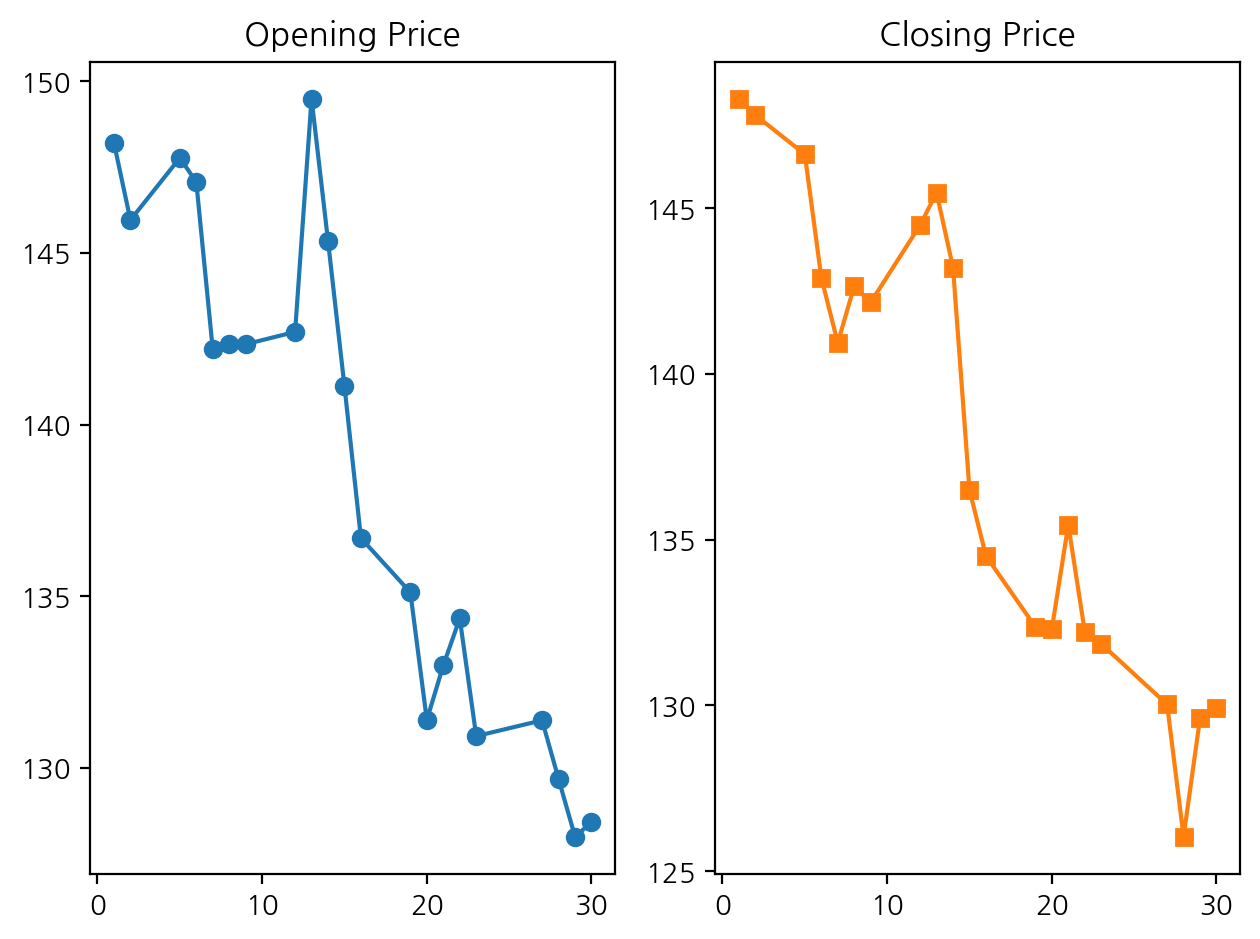

In [138]:
plt.subplot(1, 2, 1)
plt.plot(stock['Day'].astype(int), stock['Open'], color='tab:blue', marker='o')  # astype(int)로 숫자로 바꿔서 문자로 썼을때 겹쳐서 안보이는 부분을 방지하기 위해
plt.title('Opening Price')

plt.subplot(1, 2, 2)
plt.plot(stock['Day'].astype(int), stock['Close'], color='tab:orange', marker='s')
plt.title('Closing Price')

plt.tight_layout()
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

*️⃣ 아래 정보를 참고해 선 그래프를 그리세요.

- 그래프1: Day 열과 Open 열을 x 축과 y 축으로, Day 열과 Close 열을 x 축과 y 축으로 하는 두 개의 선 그래프 겹쳐서 그리기
- 그래프2: Day 열과 High 열을 x 축과 y 축으로, Day 열과 Low 열을 x 축과 y 축으로 하는 두 개의 선 그래프 겹쳐서 그리기
- 2 행, 1 열로 위 두 그래프를 표시

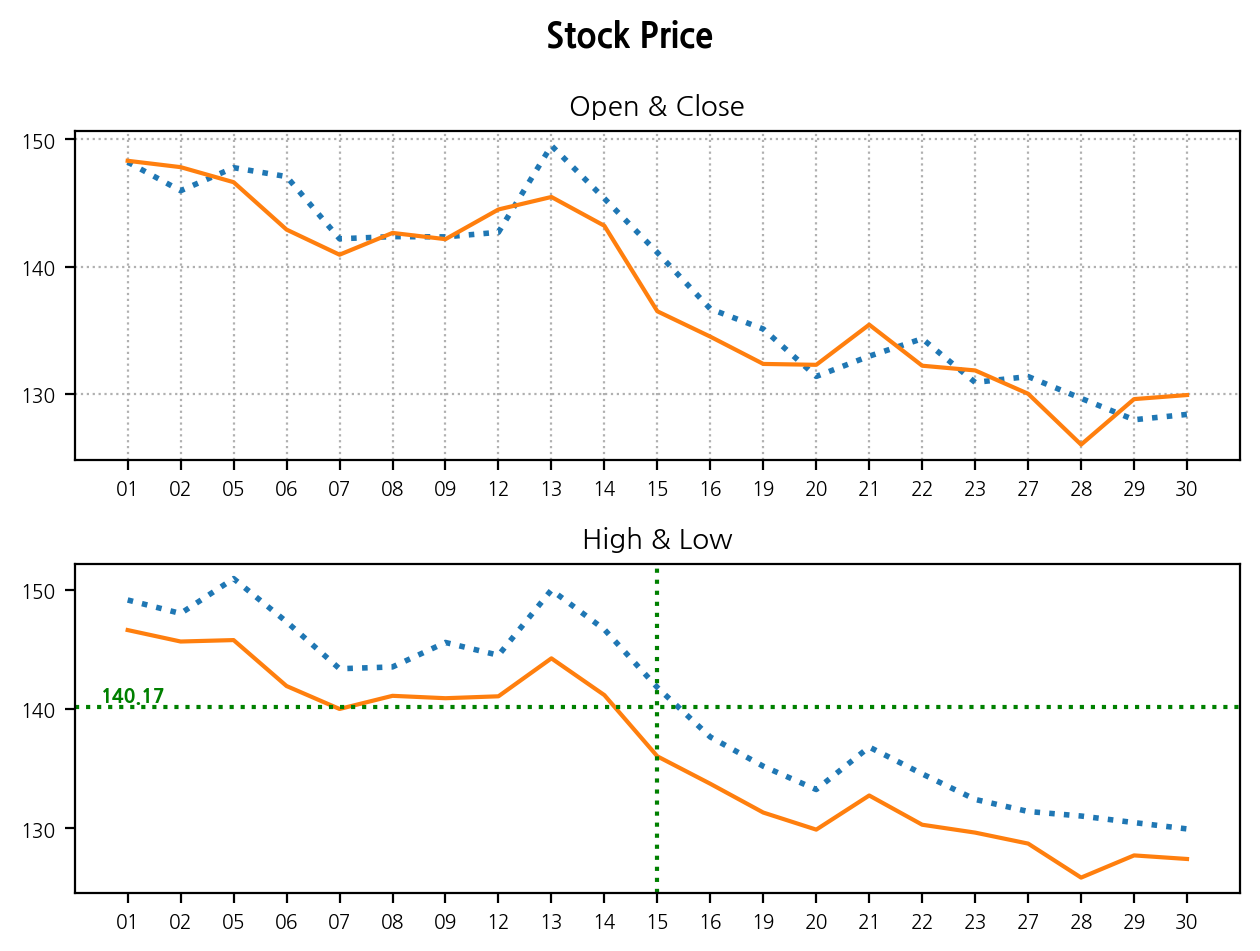

In [168]:
plt.subplot(2,1,1)
plt.plot(stock['Day'], stock['Open'], ':', linewidth=2,)
plt.plot(stock['Day'], stock['Close'],)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(axis='both', linestyle=':')
plt.title('Open & Close', fontsize=10)

y_mean=stock['High'].mean().round(2)
plt.subplot(2,1,2)
plt.plot(stock['Day'], stock['High'], ':', linewidth=2)
plt.plot(stock['Day'], stock['Low'])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.axhline(y_mean, color='green', linestyle=':')
plt.axvline(10, color='green', linestyle=':')
plt.text(-0.5, y_mean+0.5, y_mean, color='g', size=7, weight='bold')
plt.title('High & Low', fontsize=10)

plt.suptitle('Stock Price', weight='bold')
plt.tight_layout()
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>